In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_stores = pd.read_csv("/kaggle/input/retaildataset/stores data-set.csv")
df_features = pd.read_csv("/kaggle/input/retaildataset/Features data set.csv", parse_dates = ["Date"])
df_sales = pd.read_csv("/kaggle/input/retaildataset/sales data-set.csv", parse_dates = ["Date"])

In [4]:
df_stores.info()
df_stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_features.info()
df_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_sales.info()
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [7]:
#Merging features and sales data on dates

df_date = df_features.groupby("Date").agg({"Temperature" : "mean",
                                            "Fuel_Price":"mean",
                                            "CPI":"mean",
                                            "Unemployment":"mean",
                                          "IsHoliday":"sum"})
df_date = df_date.sort_index()

data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, df_date, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [8]:
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,46.601399,60.663782,3.358607,171.578394,7.999151
std,5.399713,15.172792,0.429401,3.100148,0.483853
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,47.000000,74.697333,3.726133,174.724576,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


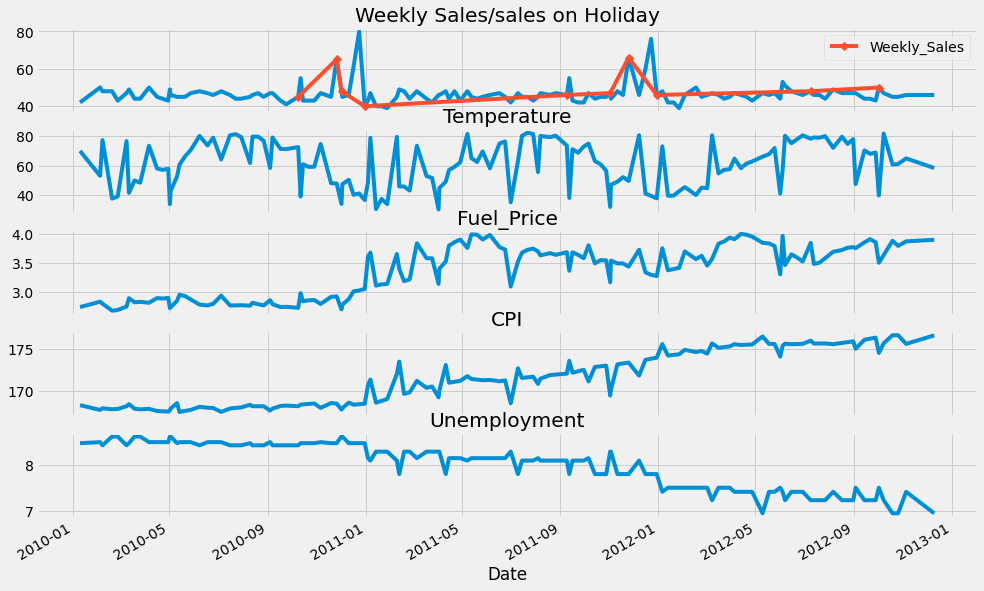

In [9]:
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0], legend = "Holiday Week Sales")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

We can observe that:
1. Fuel prices have gone up over the years
2. Consumer Price Index has gone up very closely related to Fuel Price changes.
3. Unemployment has gone down which is logical considering CPI has gone up. 

Now, lets check some correlations to check if they confirm our observations.

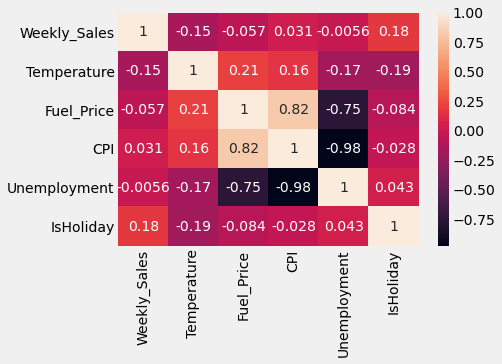

In [10]:
sns.heatmap(data.corr(), annot = True)

We can see that Umemployment and CPI are negatively correlated exactly what we observed from the plots.

We can also see that Umeployment and Fuel Price are negatively correlated, while CPI and Fuel Prices are positively correlated

Lets visualize some monthly data now

Text(0, 0.5, 'Sales')

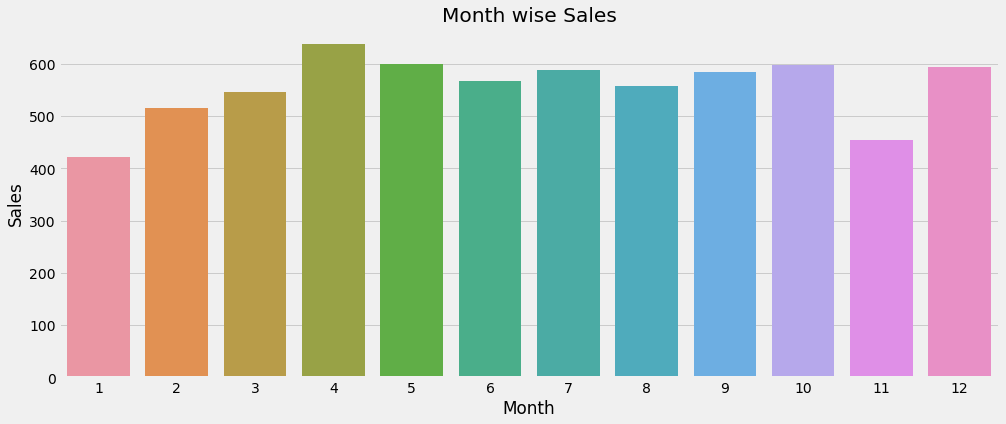

In [11]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize = (15,6))
sns.barplot(x = data_sales_month.index, y = data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

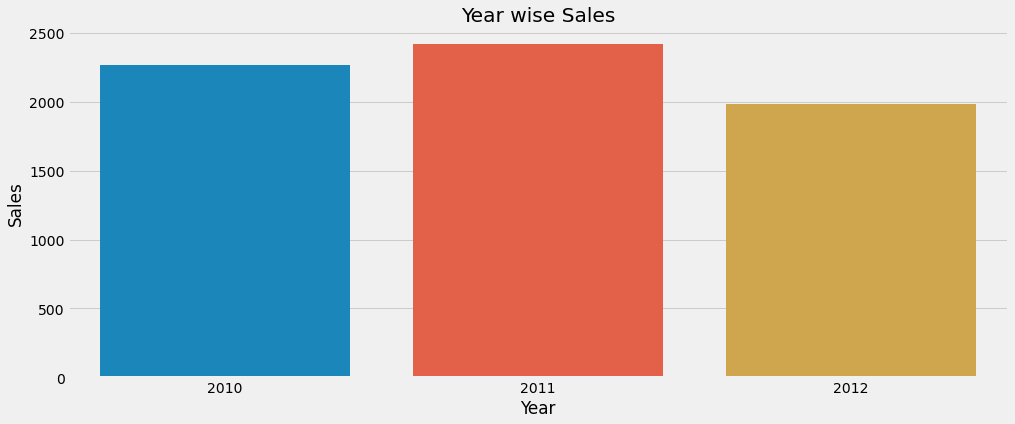

In [12]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})
plt.figure(figsize = (15,6))
sns.barplot(x = data_sales_year.index, y = data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

Let's analyse the store data now

In [13]:
data_store = df_features.groupby("Store").agg({"Temperature" : "mean",
                                            "Fuel_Price":"mean",
                                          "IsHoliday":"sum"})

temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})

temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_store.set_index(np.arange(0,45),inplace=True)
df_store = pd.merge(temp_store, data_store, left_index=True,right_index=True, how='left')
#data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )
df_stores["temp"] = data_store.Temperature
df_stores["Fuel_Price"] = data_store.Fuel_Price
df_stores["holiday"] = data_store.IsHoliday
df_stores["Weekly_Sales"] = temp_store.Weekly_Sales

In [14]:
df_stores.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


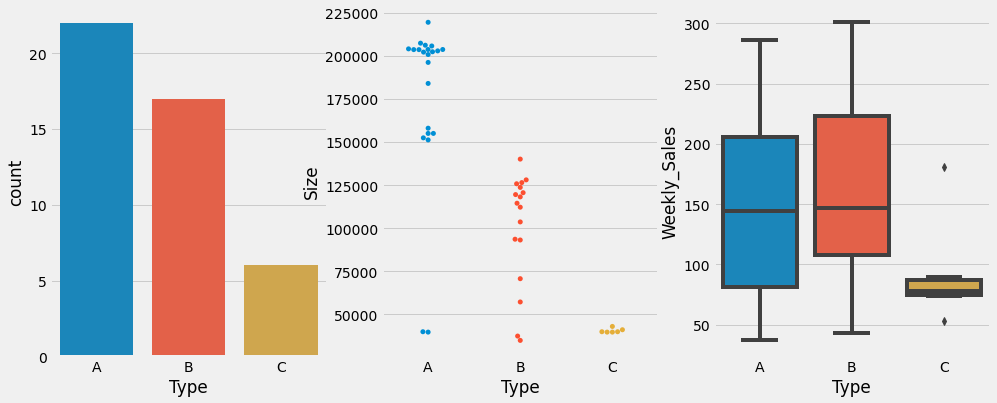

In [15]:
fig, ax = plt.subplots(1,3, figsize = (15,6))
sns.countplot(df_stores.Type, ax =ax[0])
sns.swarmplot(data = df_stores, x = "Type", y = "Size", ax = ax[1])
sns.boxplot(data = df_stores, x = "Type" , y = "Weekly_Sales", ax = ax[2])

Lets analyse the data department wise

In [16]:
len(df_sales['Dept'].unique())

81

In [17]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [18]:
data_dept = df_sales.groupby("Dept").agg({"Weekly_Sales" : "sum"})
data_dept.Weekly_Sales = data_dept.Weekly_Sales/10000
data_dept.Weekly_Sales = data_dept.Weekly_Sales.apply(int)
data_dept.sort_values(by = "Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


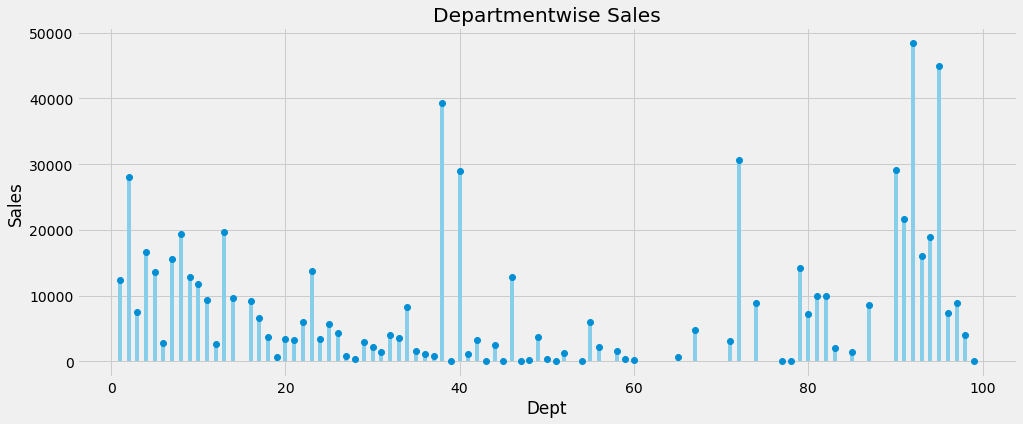

In [19]:
plt.figure(figsize = (15,6))
plt.plot(data_dept.index, data_dept["Weekly_Sales"], "o")
plt.ylabel("Sales")
plt.xlabel("Dept")
plt.title("Departmentwise Sales")
plt.vlines (x = data_dept.index, ymin = 0, ymax = data_dept["Weekly_Sales"], color = 'skyblue')

Department 90 - 95 have high weekly sales. Dept 1-15 have weekly sales around USD15000. There are a couple of departments such as 38, 40, 73 with total weekly sales touching USD30000

In [20]:
sales_date_store = df_sales.groupby(["Date", "Store"]).agg({"Weekly_Sales" : "sum"})
sales_date_store.sort_index(inplace = True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
sales_date_store.head()

Weekly_Sales
Date       Store              
2010-01-10 1               145
           2               182
           3                35
           4               184
           5                28

In [46]:
data_table = pd.merge(df_features, sales_date_store, how = "left", on = ["Date", "Store"])
data_table = pd.merge(data_table, df_stores[["Store", "Type"]], how = "left", on = ["Store"])
data_table.head(20)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,164.0,A
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,164.0,A
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,161.0,A
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,140.0,A
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,155.0,A
5,1,2010-12-03,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,143.0,A
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,147.0,A
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,140.0,A
8,1,2010-02-04,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,159.0,A
9,1,2010-09-04,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,154.0,A


In [22]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

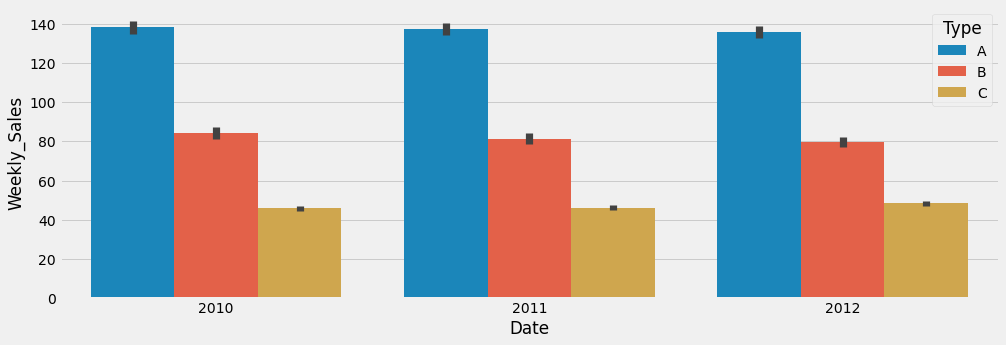

In [23]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

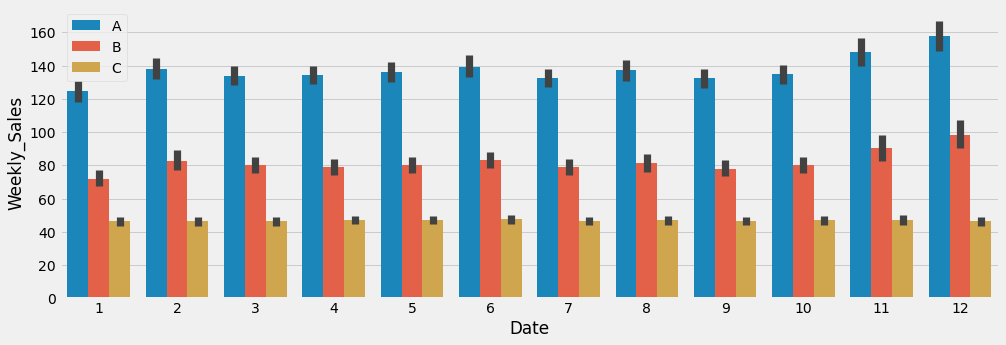

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)
plt.legend(loc = "best")

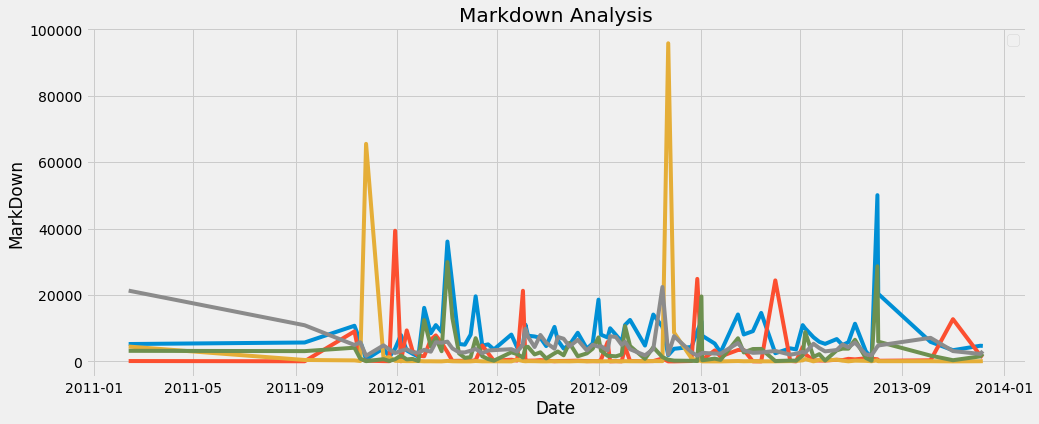

In [25]:
plt.figure(figsize = (15,6))
markdown_data = data_table[data_table.MarkDown2.notnull()]
markdown_data = markdown_data.groupby("Date").agg({"MarkDown1": "mean", "MarkDown2": "mean", "MarkDown3": "mean", "MarkDown4": "mean", "MarkDown5": "mean"})

plt.plot(markdown_data.index, markdown_data.MarkDown1)
plt.plot(markdown_data.index, markdown_data.MarkDown2)
plt.plot(markdown_data.index, markdown_data.MarkDown3)
plt.plot(markdown_data.index, markdown_data.MarkDown4)
plt.plot(markdown_data.index, markdown_data.MarkDown5)
plt.xlabel("Date")
plt.ylabel("MarkDown")
plt.title("Markdown Analysis")
plt.legend(loc = "best")

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:434: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19f81aaed0>,
      dtype=object)

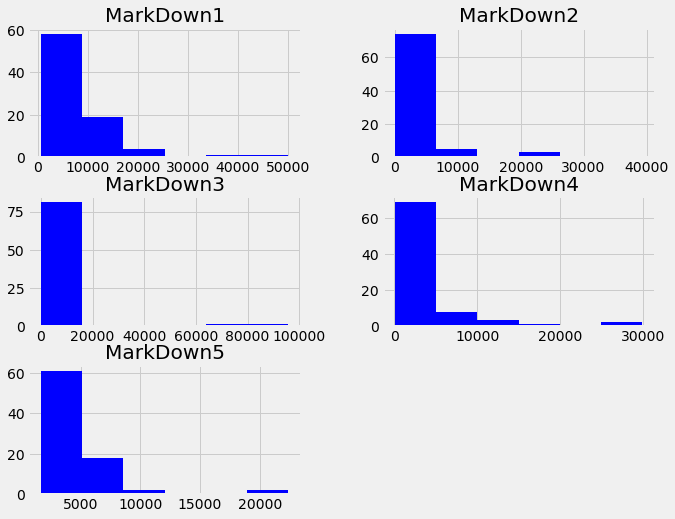

In [26]:
markdown_data.hist(figsize = (10,8), bins = 6, color = 'B')

Text(0, 0.5, 'Markdown')

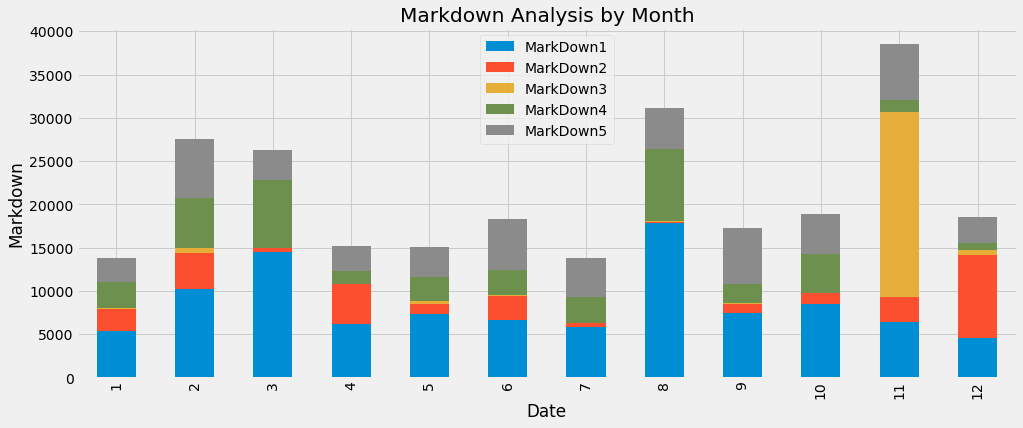

In [27]:
markdown_data_month = markdown_data.groupby(markdown_data.index.month).agg({"MarkDown1": "mean", "MarkDown2": "mean", "MarkDown3": "mean", "MarkDown4": "mean", "MarkDown5": "mean"})
markdown_data_month.plot(kind = 'bar', stacked = True, figsize = (15,6))
plt.title("Markdown Analysis by Month")
plt.ylabel("Markdown")

Text(0, 0.5, 'Markdown')

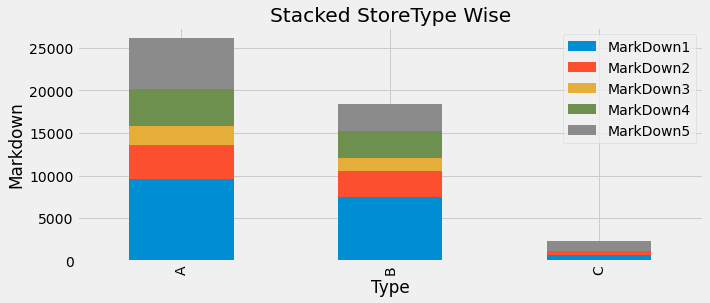

In [28]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")

# Prediction on Date and Store

In [29]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [30]:
def createdummies(data,cols):
    for col in cols:
        one_hot = pd.get_dummies(data[col],prefix=col)
        data = data.join(one_hot)
        data.drop(col,axis = 1,inplace=True)
    
    return data

In [47]:
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})
#data_table['Type'] = data_table['Type'].map({'A': '1', 'B': '2', 'C': '3'})

In [32]:
data_table.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-05-02,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,1,164.0,A
1,1,2010-12-02,38.51,2.548,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.242170,8.106,0,164.0,A
2,1,2010-02-19,39.93,2.514,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.289143,8.106,1,161.0,A
3,1,2010-02-26,46.63,2.561,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.319643,8.106,1,140.0,A
4,1,2010-05-03,46.50,2.625,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.350143,8.106,1,155.0,A


In [60]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
#X_test = data_test.drop('Weekly_Sales', axis=1)
#y_test = data_test['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [62]:
object_cols

['Type']

In [63]:
from sklearn.preprocessing import LabelEncoder
label_X_train = X_train.copy()
label_X_test = X_test.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])

In [64]:
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

In [65]:
X_train = pd.concat([num_X_train, label_X_train['Type']], axis=1)
X_test = pd.concat([num_X_test, label_X_test['Type']], axis=1)

In [66]:
import datetime as dt
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_train['Date']=X_train['Date'].map(dt.datetime.toordinal)

In [67]:
classifiers = [
    LinearRegression(),
    ElasticNet(),
    #RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    #KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    #SVR(), 
    #LinearSVR(), 
    #NuSVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

In [68]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
Lasso,48.427884,0.258770,"Lasso(alpha=16, random_state=100)"
ElasticNet,44.650980,0.369879,ElasticNet()
ElasticNet,44.161661,0.383614,ElasticNet(alpha=0.8)
LinearRegression,42.219546,0.436636,LinearRegression()
AdaBoostRegressor,36.650277,0.575462,"(DecisionTreeRegressor(max_depth=3, random_sta..."
DecisionTreeRegressor,16.186726,0.917191,DecisionTreeRegressor()
GradientBoostingRegressor,15.370302,0.925333,([DecisionTreeRegressor(criterion='friedman_ms...
RandomForestRegressor,11.909424,0.955173,"(DecisionTreeRegressor(max_features='auto', ra..."
LGBMRegressor,9.124585,0.973686,LGBMRegressor()


In [69]:
model = df_score.loc["XGBRegressor","model"]
#data_test.drop(['Weekly_Sales'],axis=1,inplace=True)
predict = model.predict(X_test)
predict

array([ 34.94916 ,  52.795403,  40.60949 , ..., 211.15173 ,  90.511024,
        57.196682], dtype=float32)

In [83]:
predict_series = pd.Series(predict, index = X_test.index)
prediction = pd.concat([X_test, predict_series], axis=1)
prediction.rename(columns = {0:'Weekly_Sales'}, inplace = True)

In [89]:
prediction

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Weekly_Sales
7944,44,734812,56.47,3.809,529.200000,3395.789943,2.100000,-1086.192534,1064.560000,131.145333,5.621,1,2,34.949162
7474,42,733892,69.76,3.105,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,126.380567,9.524,1,2,52.795403
2832,16,734522,29.30,3.055,2087.190000,1399.470000,5.580000,75.830000,4742.740000,196.779665,6.162,1,1,40.609489
1889,11,734202,86.14,3.699,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,218.644937,7.574,1,0,137.453110
1894,11,734356,87.17,3.480,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,218.642470,7.567,1,0,133.337021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,45,734515,41.18,3.513,3489.730000,11219.720000,0.920000,489.070000,9596.290000,189.326096,8.424,1,1,63.246632
3542,20,734396,64.02,3.742,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,209.189389,7.274,1,0,196.561356
3459,20,734108,22.12,2.773,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,204.385747,8.187,0,0,211.151733
1335,8,734353,65.62,3.622,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,218.502670,6.297,1,0,90.511024
